# Practical tasks

##### Please explore the datasets and answer the questions below.
##### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# you will need to import more libraries as needed

# Clustering tasks

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem `shopping-data.csv`

#### 1. Load the data and preview

In [ ]:
customer_data = pd.read_csv('shopping-data.csv')

In [ ]:
customer_data.head()

In [ ]:
customer_data.describe()

#### 2. Plot scatter plot for annual income and spending score which will be used for clustering in the next steps

Text(0, 0.5, 'Spending Score')

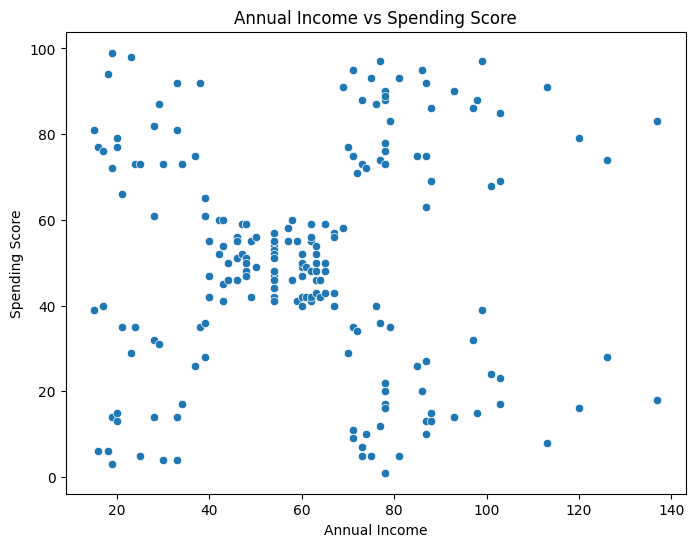

In [10]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    data=customer_data
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

#### 3. Normalize the data

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 4. Use Elbow method to decide number of clusters

In [12]:
elbow=[]
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=555, max_iter=200)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)

#### 5. Perform Clustering using KMeans

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
customer_data['Cluster'] = clusters


#### 6. Plot scatter plot and color code in clustered groups

Text(0.5, 1.0, 'KMeans Clustering')

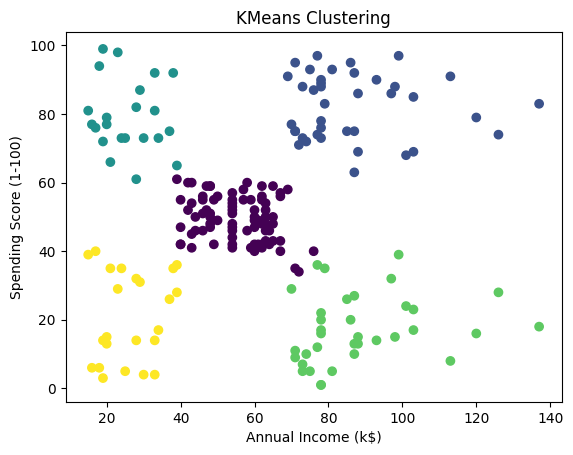

In [22]:
plt.figure()
plt.scatter(customer_data['Annual Income (k$)'], 
            customer_data['Spending Score (1-100)'], 
            c=customer_data['Cluster'])

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('KMeans Clustering')



#### 7. Plot dendrogram to decide number of clusters for Hierarchical Clustering. <br> Explain (free text in a markdown cell) what is the optimal number of clusters and why

Text(0, 0.5, 'Euclidean Distance')

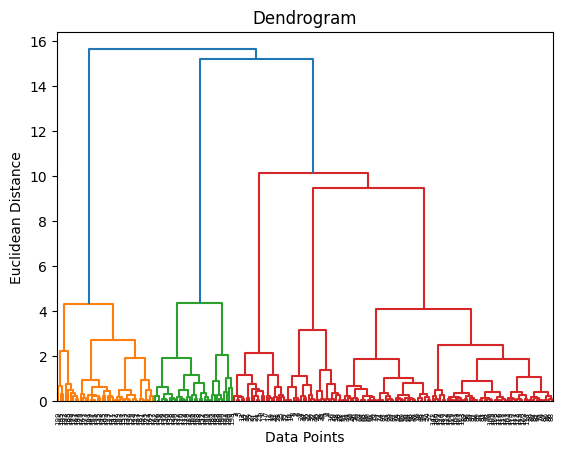

In [ ]:
linked = linkage(X_scaled, method='ward')

plt.figure()
dendrogram(linked)

plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
# number of clusters is determined by looking for the largest vertical distance between horizontal lines before clusters merge

#### 8. Do clustering using Hierarchical Clustering

In [27]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)
customer_data['HC_Cluster'] = hc_labels




#### 9. Plot scatter plot and color code in clustered groups

Text(0.5, 1.0, 'Hierarchical Clustering')

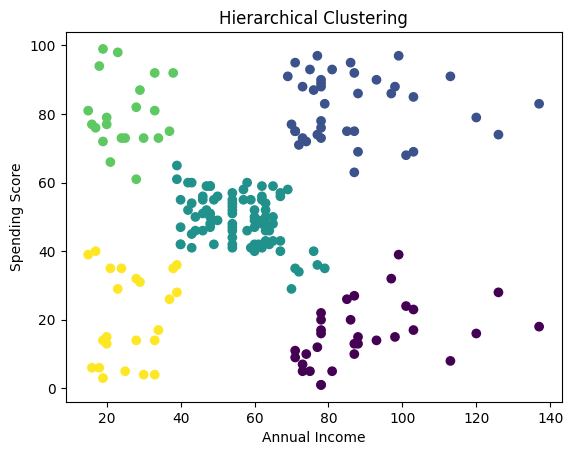

In [35]:
plt.scatter(customer_data['Annual Income (k$)'],
            customer_data['Spending Score (1-100)'],
            c=customer_data['HC_Cluster'])

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering')

####  10. Do KMeans and DBSCAN clustering on this data

In [42]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples=2000)



Text(0.5, 1.0, 'Half Moons')

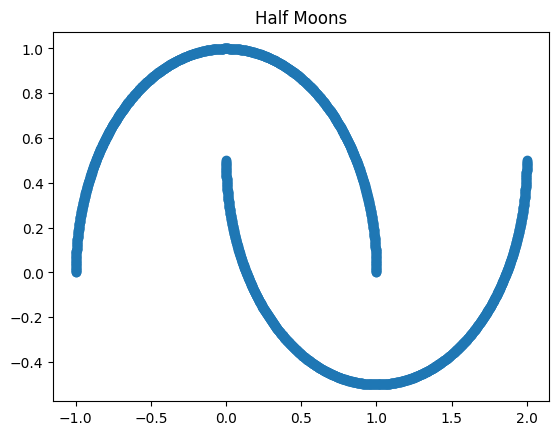

In [43]:
plt.scatter(moons_X[:,0],moons_X[:,1])
plt.title('Half Moons')

#### Using KMeans (do clustering and plot results (each cluster in own color))

Text(0.5, 1.0, 'KMeans Clustering on Half Moons')

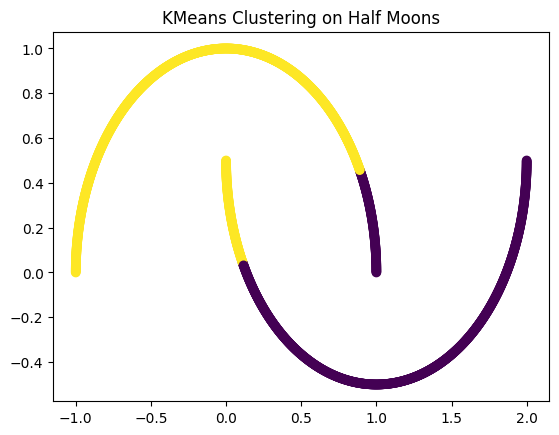

In [47]:
scaler = StandardScaler()
moons_scaled = scaler.fit_transform(moons_X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(moons_scaled)

plt.scatter(moons_X[:, 0], moons_X[:, 1], c=kmeans_labels)
plt.title('KMeans Clustering on Half Moons')


In [ ]:
# <your code here>

#### 11. Using DBSCAN do clustering and plot results (each cluster in own color). Find the most suitable eps and minimal samples number

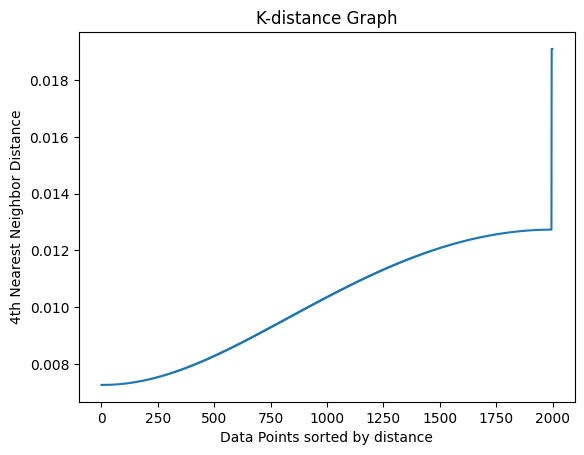

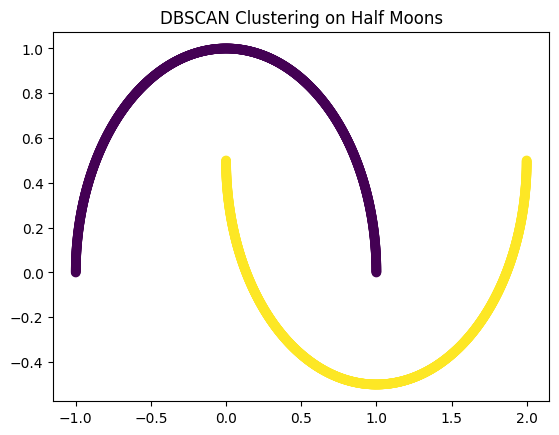

In [61]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(moons_scaled)
distances, indices = neighbors_fit.kneighbors(moons_scaled)

distances = np.sort(distances[:, 3])
plt.figure()
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Data Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")

dbscan = DBSCAN(eps=0.25, min_samples=5)
dbscan_labels = dbscan.fit_predict(moons_scaled)
plt.figure()
plt.title("DBSCAN Clustering on Half Moons")

plt.scatter(moons_X[:, 0], moons_X[:, 1], c=dbscan_labels)


#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

K-Means performs worse on the half-moons dataset because it assumes separable clusters and splits the curved shapes incorrectly. DBSCAN is better because it detects shaped clusters and correctly identifies the two crescent structures.

### Perform PCA on penguins :)
###### This section uses kaggle dataset (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)
###### The tasks below include data analysis, data preprocessing, PCA, and application of classification to predict the target

#### 13. Describe the data. Do any additional exporations as you feel

In [63]:
# Dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [66]:
print(penguins.info())
print(penguins.describe())
print(penguins.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  405

#### Based on dataframe describe, in own words explain any abnormal characteristics 

<Double-click here to add your answer. Ctrl+Shift to enter> Missing values, incorrect values (negative mm - impossible and 5000 mm is extreme), also '.' in sex

#### 14. Explore corrupted data

In [76]:
# find missing values. print entries with missing values, provide shape
missing_rows = penguins[penguins.isnull().any(axis=1)]
print(missing_rows)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
339               NaN              NaN                NaN          NaN  NaN


In [74]:
# Examine sex column
unique_sex = penguins['sex'].unique()
print(unique_sex)

['MALE' 'FEMALE' nan '.']


In [70]:
# find any unusual values. Print anomal rows
anomalous_numeric_rows = penguins[(penguins['flipper_length_mm'] > 1000) | (penguins['flipper_length_mm'] < 0)]
print(anomalous_numeric_rows)

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9               42.0             20.2             5000.0       4250.0  MALE
14              34.6             21.1             -132.0       4400.0  MALE


#### 15. Based on observations above, prepare the data for PCA. Only valid rows should be present. <br> Preview dataframe, show its size

In [78]:
# clean
data = penguins.dropna().copy()
data = data[data['sex'] != '.']
data = data[(data['flipper_length_mm'] > 0) & (data['flipper_length_mm'] < 1000)]

In [79]:
# scale numerical columns. assign to a variable X_penguins
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
X_penguins = scaler.fit_transform(data[numerical_cols])


In [84]:
# assign categorical column to a variable y_penguins
y_penguins = data['sex']

print(X_penguins.shape)
print(y_penguins.shape)
print(X_penguins[:5])

(332, 4)
(332,)
[[-0.90390586  0.79035987 -1.42534179 -0.56694801]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343]
 [-1.34473838  1.09690132 -0.5691051  -0.93955126]
 [-0.86716981  1.76107445 -0.78316427 -0.6911491 ]]


#### 15. Explain the chosen null values handling strategy, how it affects the dataset (+/-)

+, very fast and easy, and ensures that the results are based on real measurements
-, we lose data, which can cause worse accuracy

#### 16. Perform PCA with 2 components. Plot the results 

<Axes: xlabel='PC1', ylabel='PC2'>

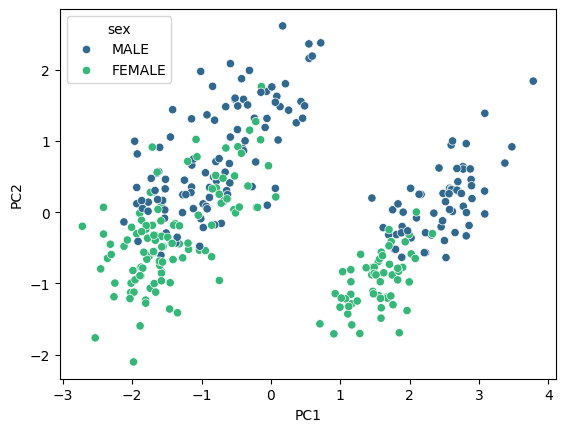

In [86]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_penguins)

pca_data = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_data['sex'] = y_penguins.values

sns.scatterplot(data=pca_data, x='PC1', y='PC2', hue='sex', palette='viridis')

#### 17. Display scree plots to determine the optimal number of components and cumulative explained variance

Text(0.5, 1.0, 'Cumulative Explained Variance')

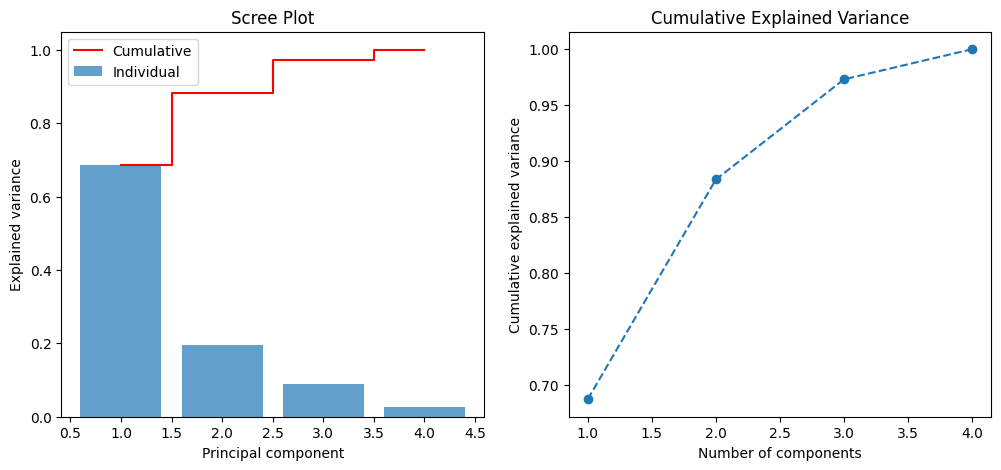

In [95]:
pca_full = PCA()
pca_full.fit(X_penguins)
exp_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(range(1, 5), exp_var, alpha=0.7, align='center', label='Individual')
ax[0].step(range(1, 5), cum_var, where='mid', label='Cumulative', color='red')
ax[0].set_ylabel('Explained variance')
ax[0].set_xlabel('Principal component')
ax[0].set_title('Scree Plot')
ax[0].legend()

ax[1].plot(range(1, 5), cum_var, marker='o', linestyle='--')
ax[1].set_ylabel('Cumulative explained variance')
ax[1].set_xlabel('Number of components')
ax[1].set_title('Cumulative Explained Variance')


#### 18. Calculate (show in numbers) and display component loadings

In [102]:
# Component loadings (how much each original feature contributes to each PC)
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=numerical_cols
)
print(loadings)


                        PC1       PC2
culmen_length_mm   0.453174  0.604990
culmen_depth_mm   -0.398518  0.792959
flipper_length_mm  0.576880  0.003798
body_mass_g        0.550478  0.072032


<Axes: >

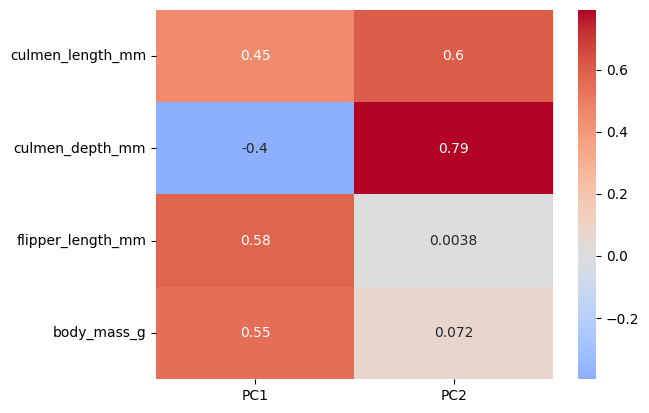

In [103]:
# show heatmap
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)

#### 19. Perform logistic regression (or any other classification algorithm) and evaluate the model

Accuracy:  0.8313253012048193
              precision    recall  f1-score   support

      FEMALE       0.87      0.83      0.85        47
        MALE       0.79      0.83      0.81        36

    accuracy                           0.83        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.83      0.83      0.83        83



Text(50.722222222222214, 0.5, 'True')

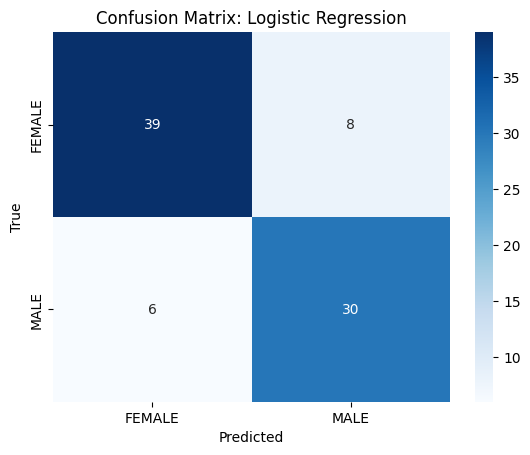

In [109]:
# import necessary libraries for model training and evaluation
# Use the PCA-transformed data (X_penguins_pca) and true labels (y_penguins)
# Train and evaluate a model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_penguins, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

#### 20. Train the model on all data points, and determine penguin sex for the data, where it was not originally identified

In [111]:
# 1. take entries from original data without sex, scale numerical columns
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [112]:
# 2. apply the same PCA transformation to the new data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data[numerical_cols])

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_target_scaled = scaler.transform(data[numerical_cols])
X_target_pca = pca.transform(X_target_scaled)

In [113]:
# 3. Train the model
# Define X_train and y_train using all PCA data from valid data
model = LogisticRegression()
model.fit(X_train_pca, data['sex'])

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [119]:
# 4. Make predictions on the new data. Display the features and predicted values
data['predicted_sex'] = model.predict(X_target_pca)

print(data[numerical_cols + ['predicted_sex']])

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

    predicted_sex  
0          FEMALE  
1          FEMALE  
2          FEMALE  
4          FEMALE  
5          